In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('dailyActivity_merged_updted.csv')
data_info = data.info()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  940 non-null    int64  
 1   ActivityDate        940 non-null    object 
 2   TotalSteps          940 non-null    int64  
 3   TotalDistance       940 non-null    float64
 4   VeryActiveDistance  940 non-null    float64
 5   Calories            940 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 44.2+ KB


In [5]:
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366     04-12-16       13162           8.50                1.88   
1  1503960366    4/13/2016       10735           6.97                1.57   
2  1503960366    4/14/2016       10460           6.74                2.44   
3  1503960366    4/15/2016        9762           6.28                2.14   
4  1503960366    4/16/2016       12669           8.16                2.71   

   Calories  
0      1985  
1      1797  
2      1776  
3      1745  
4      1863  


In [8]:
def basic_statistics(data):
    mean_value1=data['TotalSteps'].mean()
    print('Mean of total steps:',mean_value1)
    mean_value2=data['TotalDistance'].mean()
    print('Mean of Total Distance:',mean_value2)
    mean_value3=data['Calories'].mean()
    print('Mean of Calories:',mean_value3,'\n')
    
    median_value1=data['TotalSteps'].median()
    print('Median of total steps:',median_value1)
    median_value2=data['TotalDistance'].median()
    print('Median of Total Distance:',median_value2)
    median_value3=data['Calories'].median()
    print('Median of Calories:',median_value3,'\n')
    
    correlation=data[['TotalSteps','TotalDistance']].corr().iloc[0, 1]
    print('The correlation between TotalSteps and Total distance:',correlation)
    correlation=data[['TotalSteps','Calories']].corr().iloc[0, 1]
    print('The correlation between TotalSteps and Calories:',correlation)
    correlation=data[['TotalDistance','Calories']].corr().iloc[0, 1]
    print('The correlation between Total distance and Calories:',correlation,'\n')

basic_statistics(data)

Mean of total steps: 7637.9106382978725
Mean of Total Distance: 5.489702121988298
Mean of Calories: 2303.609574468085 

Median of total steps: 7405.5
Median of Total Distance: 5.2449998855
Median of Calories: 2134.0 

The correlation between TotalSteps and Total distance: 0.9853688433590527
The correlation between TotalSteps and Calories: 0.5915680862453354
The correlation between Total distance and Calories: 0.644961873681284 



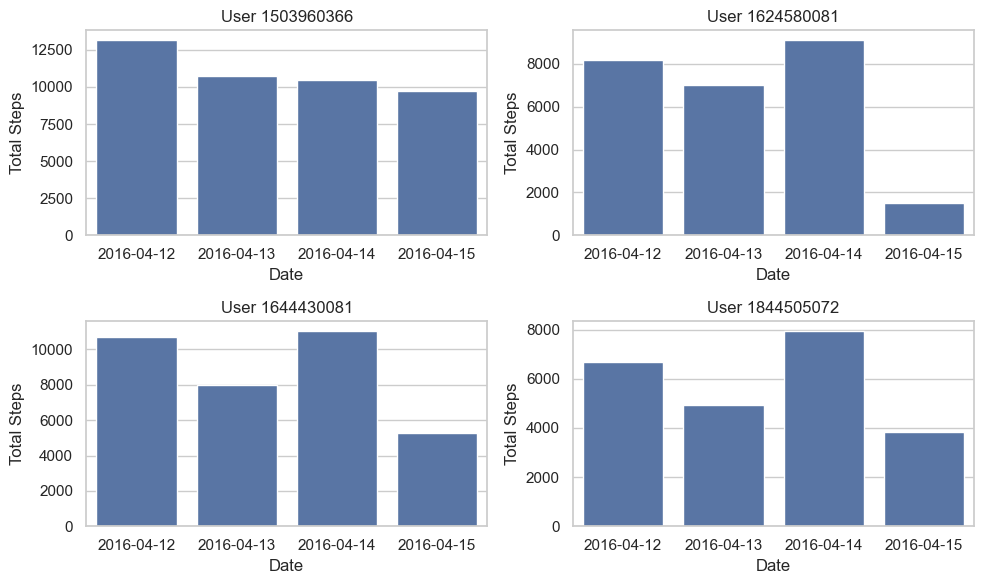

In [9]:
def plot_bar(data):
    data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])
    unique_users = data['Id'].unique()
    unique_dates = data['ActivityDate'].dt.date.unique()
    selected_users = unique_users[:4]
    selected_dates = unique_dates[:4]
    filtered_data = data[(data['Id'].isin(selected_users)) & (data['ActivityDate'].dt.date.isin(selected_dates))]
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    for i, user_id in enumerate(selected_users, 1):
        user_data = filtered_data[filtered_data['Id'] == user_id]
        plt.subplot(2, 2, i)
        sns.barplot(x=user_data['ActivityDate'].dt.strftime('%Y-%m-%d'), y=user_data['TotalSteps'])
        plt.title(f'User {user_id}')
        plt.xlabel('Date')
        plt.ylabel('Total Steps')
    
    plt.tight_layout()
    plt.show()
    
plot_bar(data)

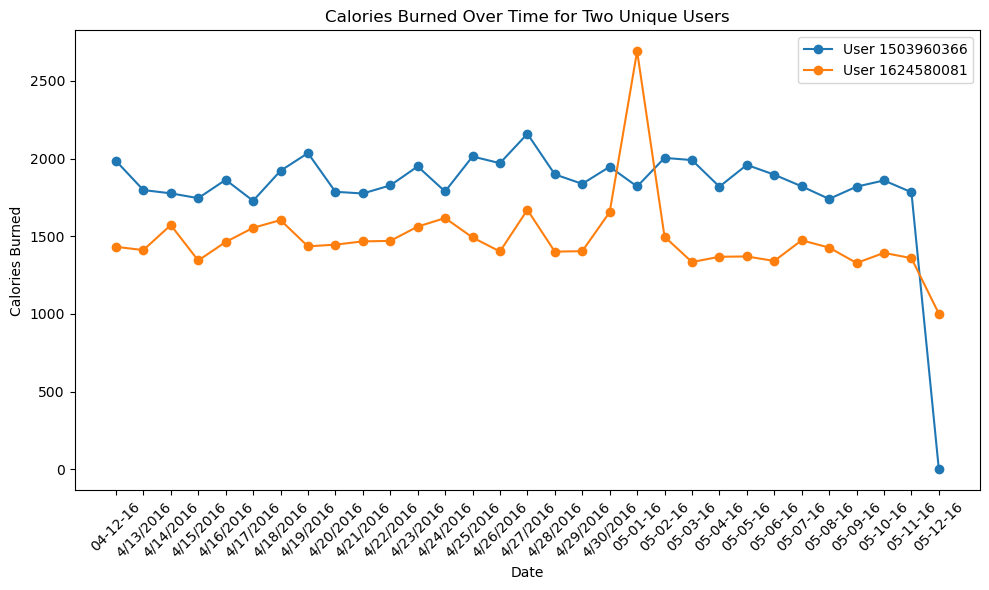

In [10]:
def line_plot(data):
    unique_ids = data['Id'].unique()[:2]
    id1, id2 = unique_ids
    data_id1 = data[data['Id'] == id1]
    data_id2 = data[data['Id'] == id2]
    plt.figure(figsize=(10, 6))
    plt.plot(data_id1['ActivityDate'], data_id1['Calories'], label=f'User {id1}', marker='o')
    plt.plot(data_id2['ActivityDate'], data_id2['Calories'], label=f'User {id2}', marker='o')
    plt.title("Calories Burned Over Time for Two Unique Users")
    plt.xlabel("Date")
    plt.ylabel("Calories Burned")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
line_plot(data)

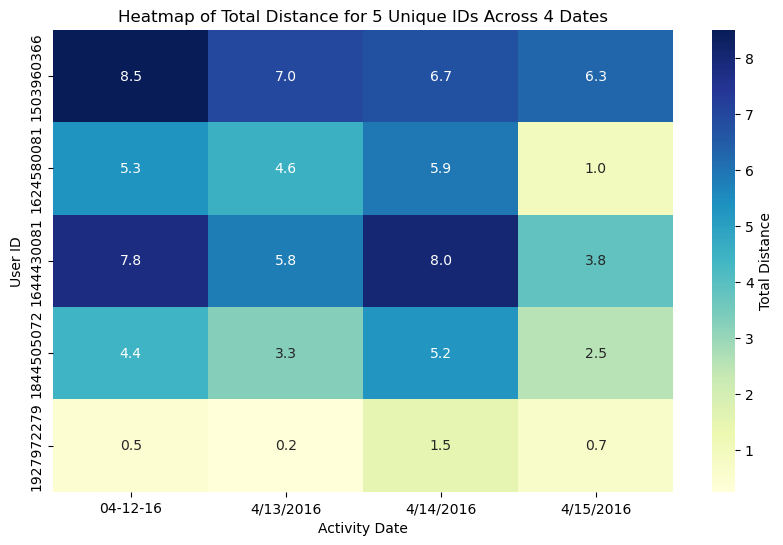

In [17]:
def heatMap(data):
    selected_ids = data['Id'].unique()[:5]
    selected_dates = data['ActivityDate'].unique()[:4] 
    filtered_data_subset = data[(data['Id'].isin(selected_ids)) & (data['ActivityDate'].isin(selected_dates))]
    distance_matrix_subset = filtered_data_subset.pivot_table(index='Id', columns='ActivityDate', values='TotalDistance')
    plt.figure(figsize=(10, 6))
    sns.heatmap(distance_matrix_subset, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Total Distance'})
    plt.title("Heatmap of Total Distance for 5 Unique IDs Across 4 Dates")
    plt.xlabel("Activity Date")
    plt.ylabel("User ID")
    plt.show()
heatMap(data)